# 7. 딥러닝

데이터 준비하기: 패션 MNIST

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
# 데이터의 크기
# 60000개의 샘플, 각 샘플은 28*28
print(train_input.shape, train_target.shape)
# 10000개의 샘플, 각 샘플은 28*28
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


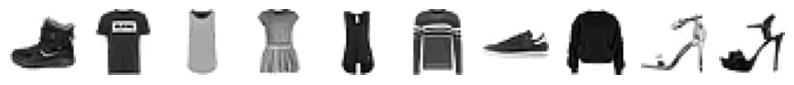

In [3]:
# 샘플 확인하기
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap="gray_r")
  axs[i].axis("off")
plt.show()

In [4]:
# 타깃값은?
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [5]:
# 타겟과 타겟별 샘플 수
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


## 7-3. 신경망 모델 훈련

- 케라스 API를 사용해 모델을 훈련하는데 필요한 다양한 도구

손실 곡선

In [28]:
# 데이터 가져오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [29]:
# 모델 만들기
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation="relu"))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation="softmax"))
    return model

In [30]:
# 모델 객체 만들기
model = model_fn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 모델 훈련시키기
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [32]:
# history 객체에 history 딕셔너리 포함됨
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


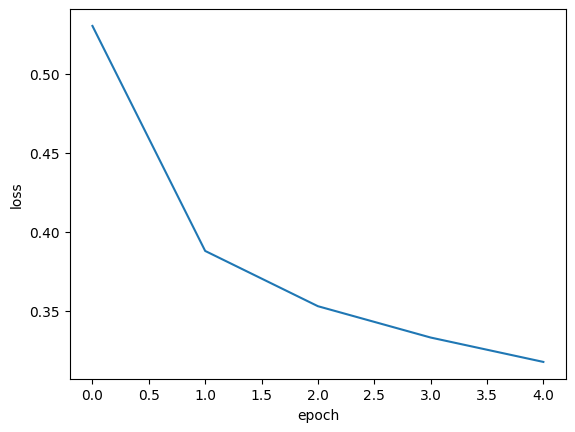

In [33]:
# history의 손실, 정확도 시각화하기
# 에포크에 따른 loss
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

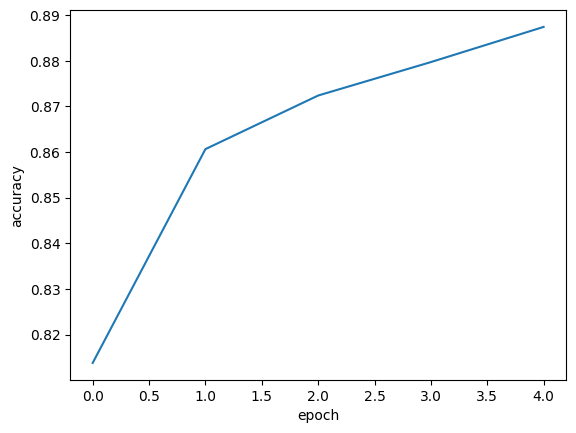

In [34]:
# 에포크에 따른 accuracy
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

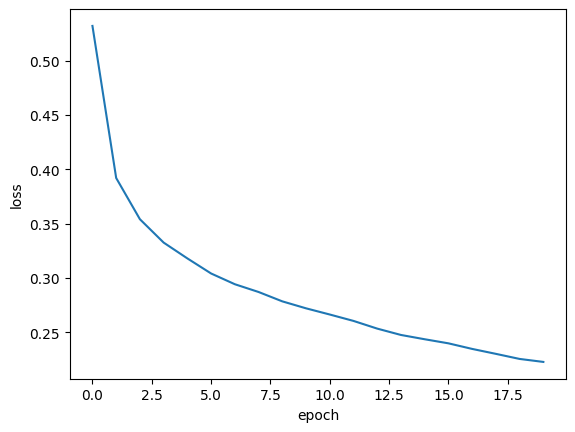

In [35]:
# 에포크가 한없이 늘어난다면? 
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

검증 손실

- 손실을 사용하여 과대/과소 적합을 다루기

In [36]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", 
              metrics="accuracy")
history = model.fit(train_scaled, train_target,
                    epochs=20, 
                    verbose=0, 
                    validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


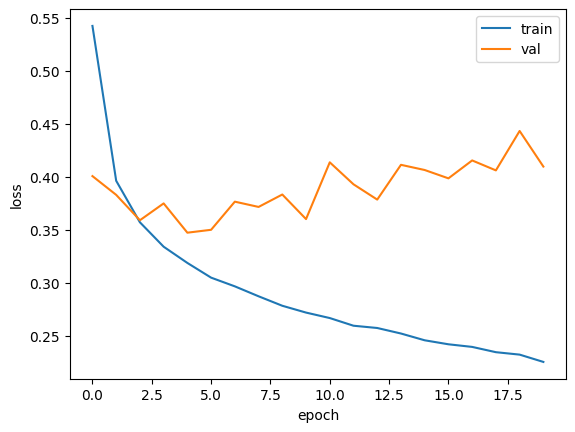

In [37]:
# 검증 세트에 대한 손실은 val loss에
# 정확도는 val accuracy에 저장됨
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

신경망에 특화된 규제 방법은? 

- idea 1) 옵티마이저 파라미터로 오버피팅 완화하기

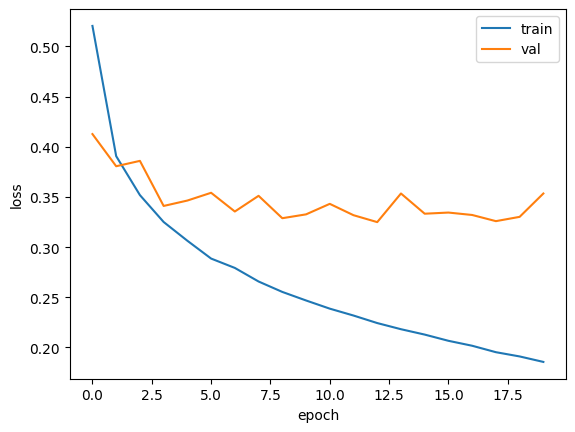

In [39]:
model = model_fn()
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")
history = model.fit(train_scaled, train_target, 
                    epochs=20, 
                    verbose=0, 
                    validation_data=(val_scaled, val_target))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

드롭아웃 dropout

- 제프리 힌턴(딥러닝의 아버지)가 소개함
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다
- 1) 이렇게 일부 뉴런을 끔으로써 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있다
- 2) 여러 개의 신경망을 앙상블하는 것과 같음

In [40]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


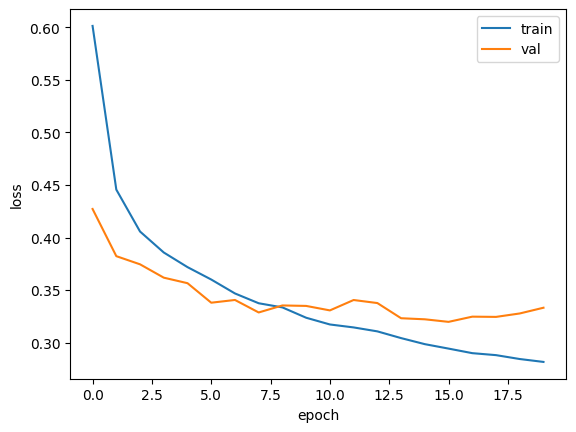

In [41]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")
history = model.fit(train_scaled, train_target, 
                    epochs=20, 
                    verbose=0, 
                    validation_data=(val_scaled, val_target))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

모델 저장과 복원

In [57]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")
history = model.fit(train_scaled, train_target, 
                    epochs=10,
                    verbose=0,
                    validation_data=(val_scaled, val_target))

In [45]:
model.save_weights("model-weights.h5")

In [46]:
model.save("model-whole.h5")

In [47]:
!ls -al *.h5

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [52]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")

모델 복원하기

In [49]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels==val_target))

375/375 [==============================] - 1s 3ms/step
0.1215


In [ ]:

model.save("keras.h5")
new_model = keras.models.load_model("keras.h5")
test_loss, tess_acc = new_model.evaluate(val_scaled, val_target, verbose=2)

In [61]:
model = keras.models.load_model("keras.h5")
model.evaluate(val_scaled, val_target, verbose=2)

375/375 - 1s - loss: 0.3320 - accuracy: 0.8792 - 739ms/epoch - 2ms/step


[0.33200910687446594, 0.8792499899864197]

콜백 callback

- 콜백: 훈련 중간에 어떤 작업을 수행할 수 있게 하는 객체
- keras.callbacks 패키지
- fit() 매소드의 callbacks 매개변수에 리스트로 전달


In [63]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")
# 모든 에포트마다 모델을 저장하는 콜백 클래스
# 단, 가장 좋은 모델만을 저장하도록 설정함
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5",
                                                save_best_only=True)
model.fit(train_scaled, train_target, 
          epochs=20,
          verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [64]:
model = keras.models.load_model("best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3182 - accuracy: 0.8868


[0.318240225315094, 0.8868333101272583]

조기 종료 Early Stopping

- 훈련 에포크 횟수를 제한하기
- 모델이 오버피팅되지 않도록 막아준다

In [65]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(
    train_scaled, train_target, 
    epochs=20, 
    verbose=0, 
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

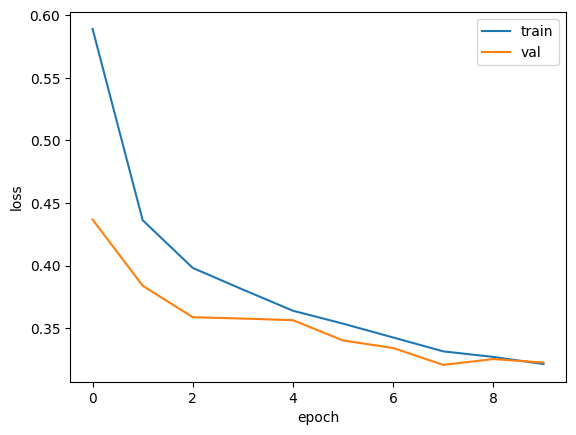

In [66]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [67]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3208 - accuracy: 0.8849


[0.32075798511505127, 0.8849166631698608]